# # Main Library


In [1]:
# Reading Data And Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# -----------------------------

# preprocissing
from sklearn.preprocessing import LabelEncoder

# Make Model 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_recall_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score

# Hypear parameter
from sklearn.model_selection import GridSearchCV

In [2]:
# Data
data = pd.read_csv("D:\Courses language programming\Machine Learning\Folder Machine Learning\Sonar&Mine\Copy of sonar data.csv", header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [3]:
data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [4]:
print(data.shape)

(208, 61)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


# # inforamation ==> data
Data is cleaning.
and Rows == 208 , col == 61 .
value_count == > (R, Rock) == 97
            == > (W, Wine) == 111

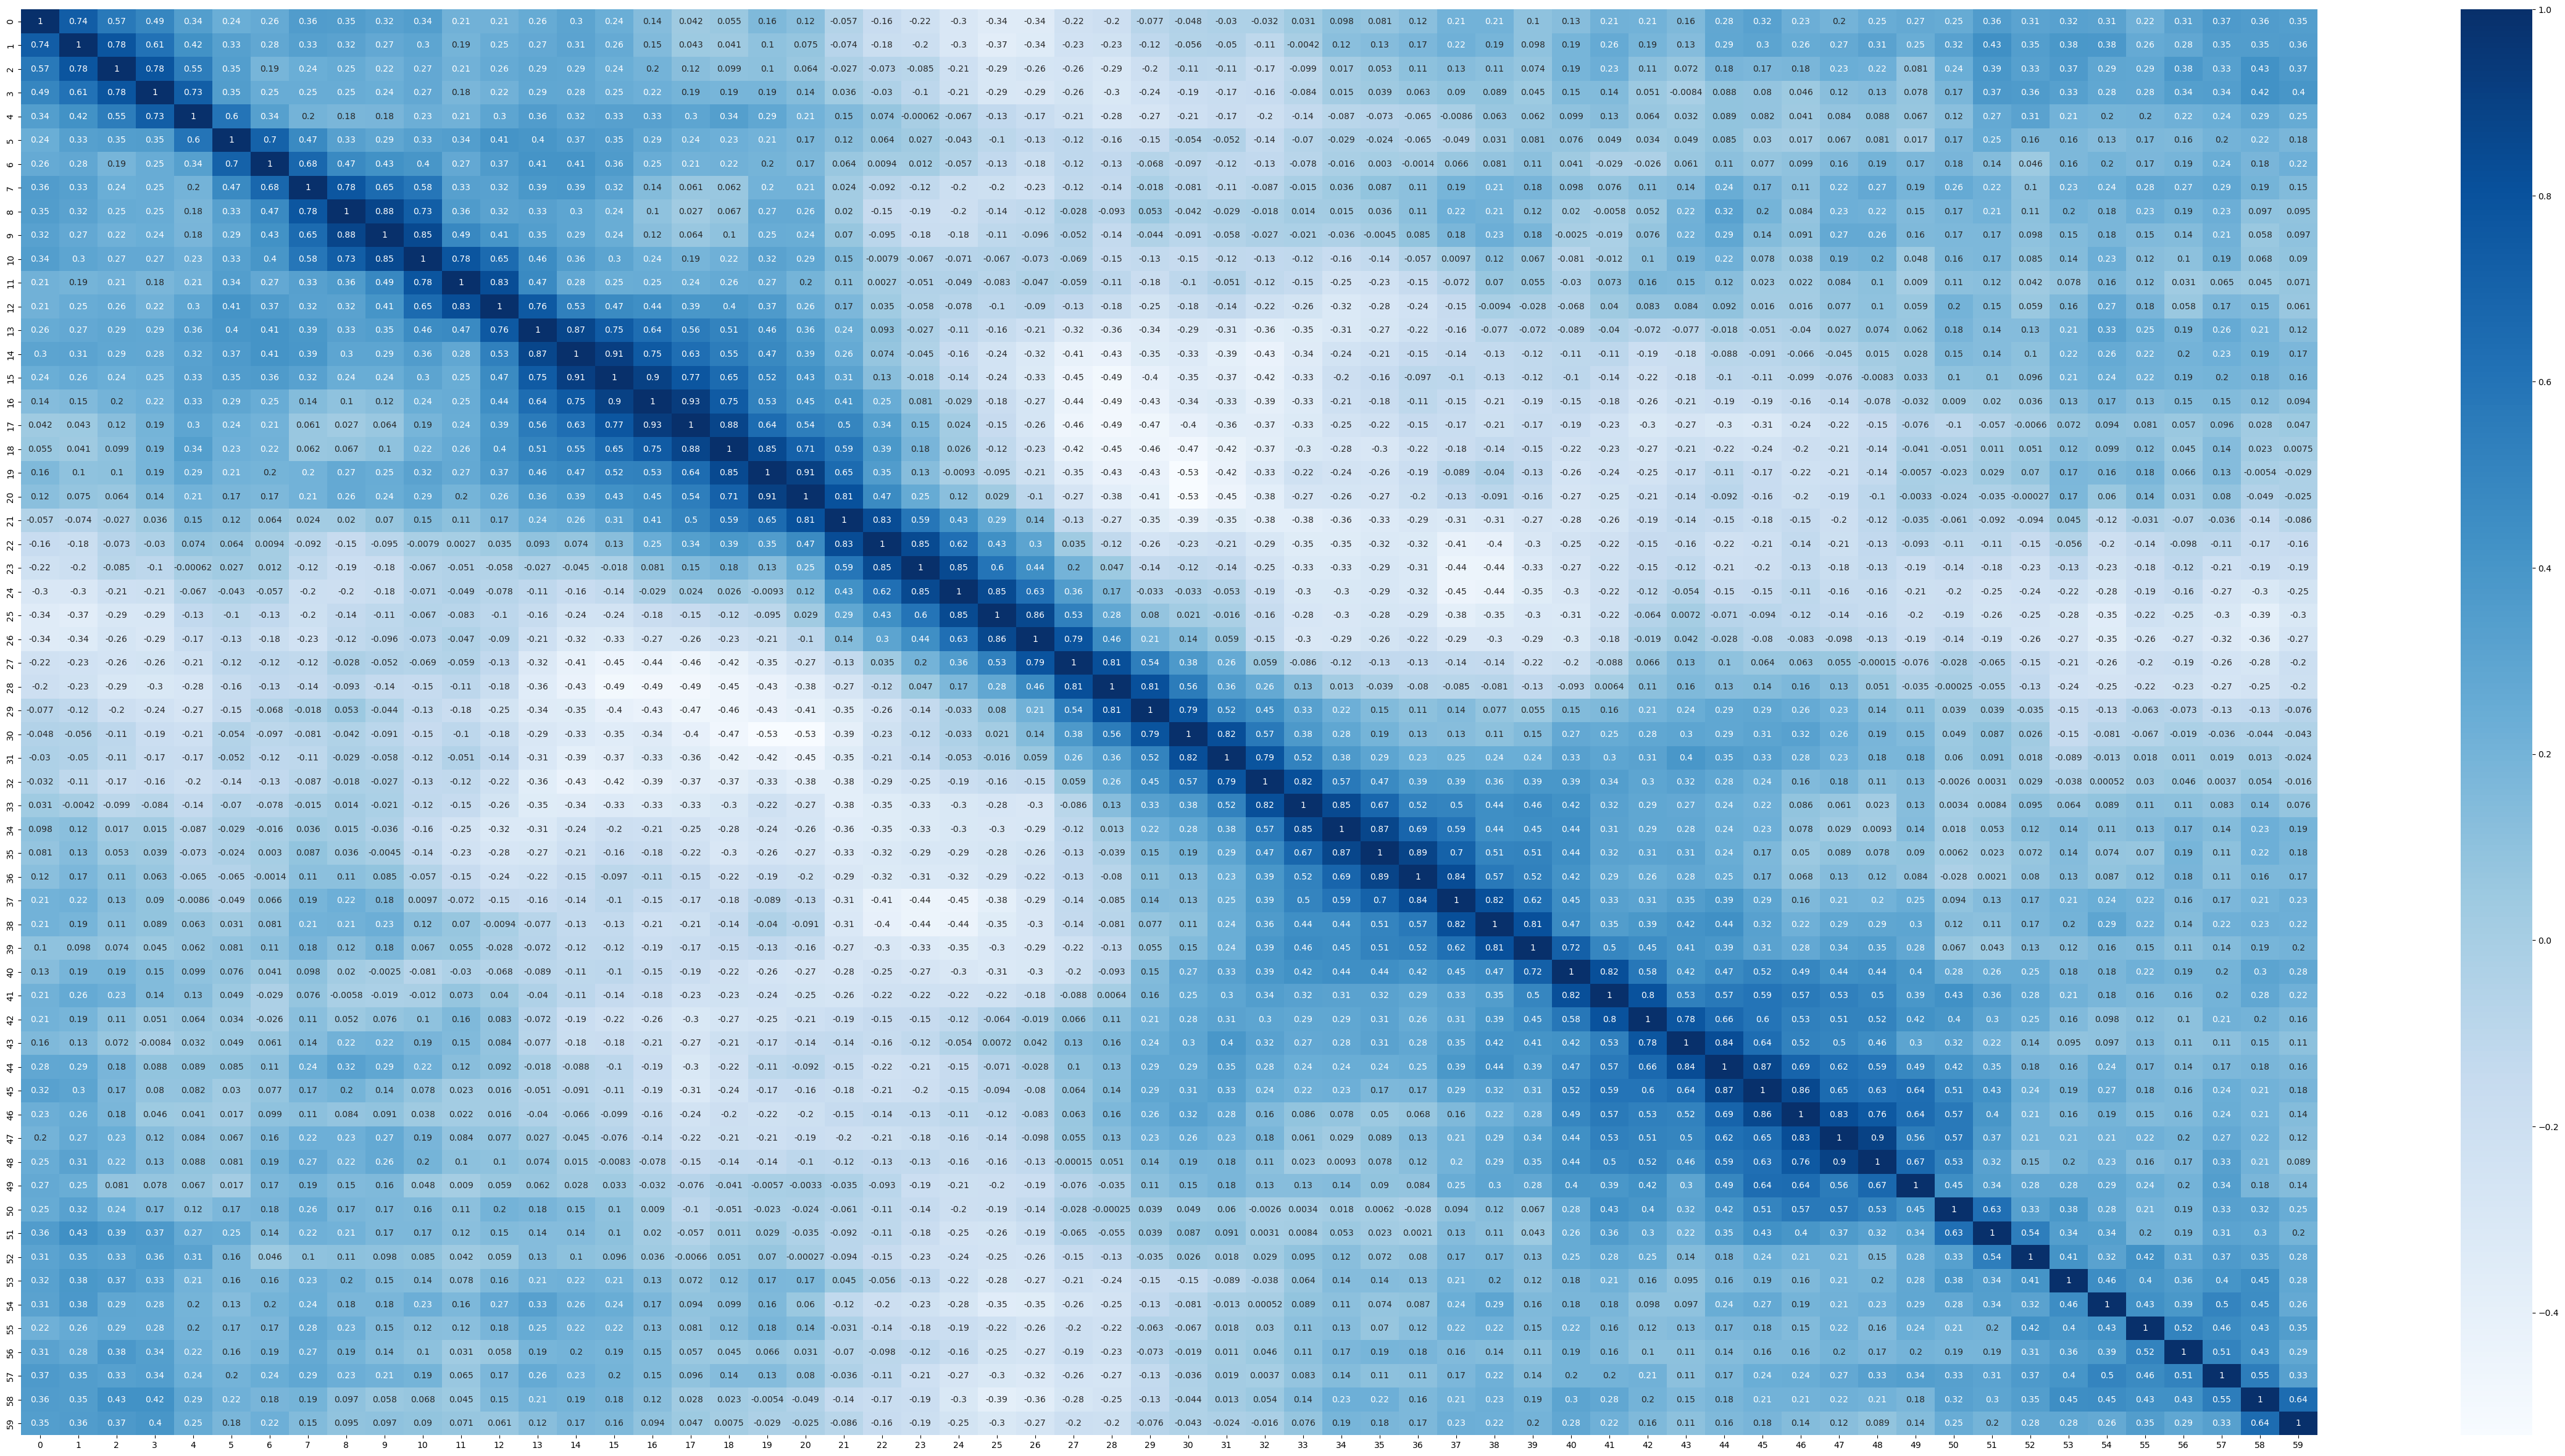

In [7]:
plt.figure(figsize=(60, 30))
sns.heatmap(data.corr(), annot=True, cmap="Blues");

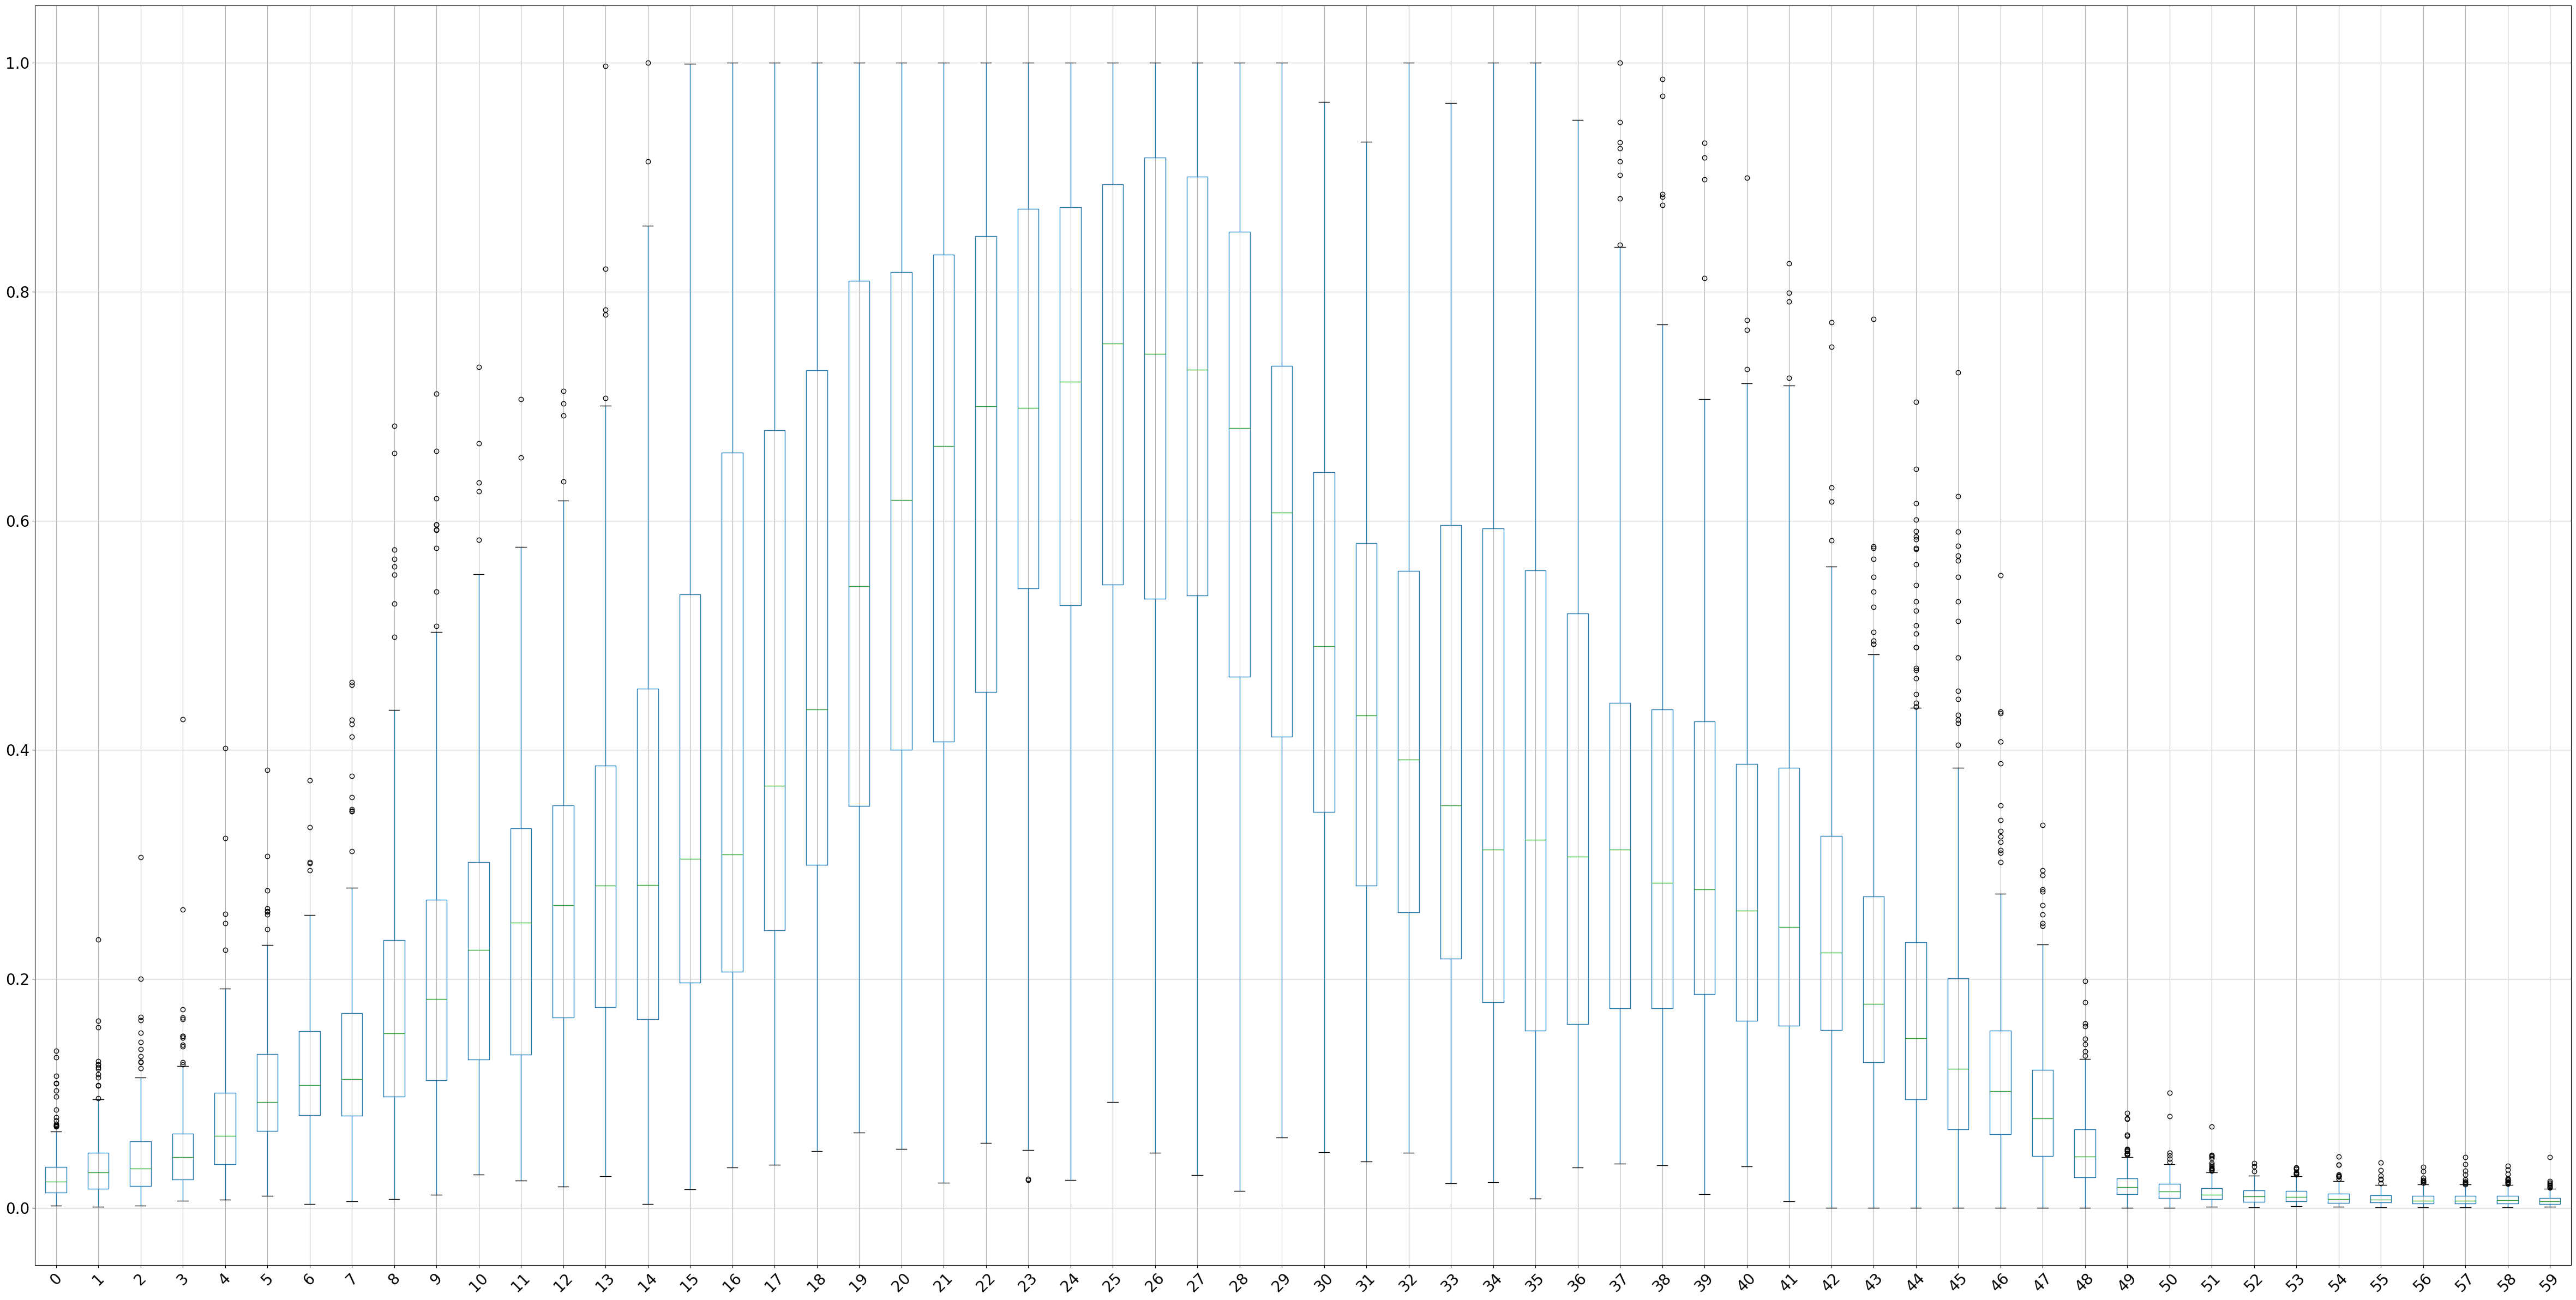

In [8]:
plt.figure(figsize=(60, 30))
data.boxplot(grid=True, fontsize=20, rot=45,);

# # Label Encoder

In [9]:
la = LabelEncoder()

data[60] = la.fit_transform(data[60])
data[60]

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: 60, Length: 208, dtype: int32

# Rock(R) == > 1
# Mine(M) == > 0

# # Train_test_split ==> Model

In [10]:
x_input = data.drop(60, axis=1)
y_output = data[60]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_input, y_output, train_size=0.7, random_state=42)

# Model_1 ==> logistic_regression

In [12]:
model_logi = LogisticRegression()
model_logi.fit(x_train, y_train)

LogisticRegression()

In [13]:
print(model_logi.score(x_train, y_train))
print(model_logi.score(x_test, y_test))

0.8551724137931035
0.8095238095238095


In [14]:
# MAke Hyper_parameter In LogisticRegression
param = {"penalty": ['l1', 'l2', 'elasticnet', "none"],
         "C": [0.3, 0.4, 0.5, 0.6, 0.7 ,0.8, 0.9, 1, 1.2],
         "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

new_model_log = GridSearchCV(estimator=model_logi, 
                             param_grid=param, 
                             verbose=6,
                             cv=5, n_jobs=-1)

new_model_log.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=6)

In [15]:
new_model_log.best_estimator_, new_model_log.best_score_

(LogisticRegression(C=0.3, penalty='none', solver='sag'), 0.7724137931034483)

# Mode_2 ==> Random_Forest

In [16]:
model2_RF = RandomForestClassifier()
model2_RF.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
print(model2_RF.score(x_train, y_train))
print(model2_RF.score(x_test, y_test))

1.0
0.8095238095238095


In [18]:
train_predict = model2_RF.predict(x_train)
training_model = accuracy_score(train_predict, y_train)
print(f"The accuracy_score of training is ==> {training_model}")

The accuracy_score of training is ==> 1.0


In [19]:
test_predict = model2_RF.predict(x_test)
testing_model = accuracy_score(test_predict, y_test)
print(f"The accuracy_score of training is ==> {testing_model}")

The accuracy_score of training is ==> 0.8095238095238095


# # Build Sytsem prediction

In [20]:
input_data_prediction = np.asarray(
    (0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,0.2132,0.3738,0.3738,0.2673,0.2333,0.5367,0.7312,0.7659,0.6271,0.4395,0.4330,0.4326,0.5544,0.7360,0.8589,0.8989,0.9420,0.9401,0.9379,0.8575,0.7284,0.6700,0.7547,0.8773,0.9919,0.9922,0.9419,0.8388,0.6605,0.4816,0.2917,0.1769,0.1136,0.0701,0.1578,0.1938,0.1106,0.0693,0.0176,0.0205,0.0309,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110)
                                   ).reshape(1,-1)
# input_data_prediction
prediction = model2_RF.predict(input_data_prediction)
print(prediction)

if prediction[0] == 0:
    print("This Object is ==> Mine")
else:
    print("This Object is ==> Rock")

[1]
This Object is ==> Rock


In [21]:
# MAke Hyper_parameter In LogisticRegression
param2 = {"n_estimators": np.arange(22, 27, 1),
         "max_depth": np.arange(11, 15, 1),
         "min_samples_split": np.arange(2,4),
         "min_samples_leaf": np.arange(2,4)}

new_model_RF = GridSearchCV(estimator=model2_RF, 
                             param_grid=param2, 
                             verbose=6,
                             cv=5, n_jobs=-1,)
new_model_RF.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([11, 12, 13, 14]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3]),
                         'n_estimators': array([22, 23, 24, 25, 26])},
             verbose=6)

In [22]:
new_model_RF.best_estimator_

RandomForestClassifier(max_depth=11, min_samples_leaf=3, n_estimators=24)

In [23]:
new_model_RF.best_score_

0.8275862068965518

In [24]:
cross_val_predict_RF = cross_val_predict(estimator=new_model_RF, X = x_train, y=y_train, cv=5)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [25]:
cross_val_predict_LO = cross_val_predict(estimator=new_model_log, X = x_train, y=y_train, cv=5)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

In [26]:
print(f"The prediction Of Random Forest is ==> {cross_val_predict_RF.reshape(1, -1)}")
print(f"The prediction Of Logistic Regrsssion is ==> {cross_val_predict_LO.reshape(1, -1)}")

The prediction Of Random Forest is ==> [[0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0
  0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0
  1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1
  1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0
  1]]
The prediction Of Logistic Regrsssion is ==> [[0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0
  0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1
  1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1
  1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0
  1]]


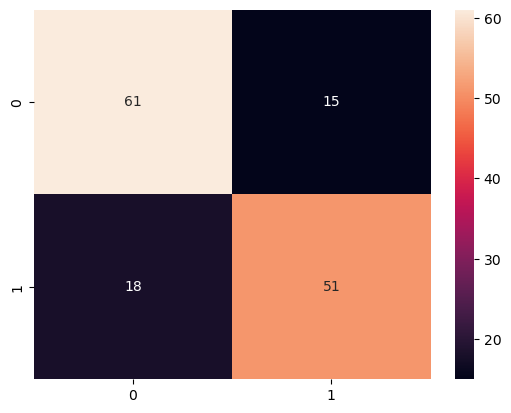

In [27]:
confusion_matrix_RF = confusion_matrix(y_train, cross_val_predict_RF)
sns.heatmap(confusion_matrix_RF, annot=True, cbar=True);

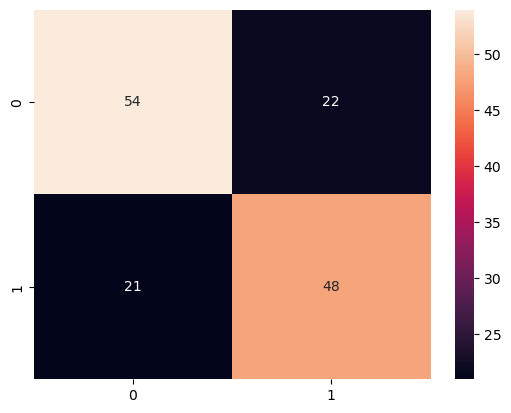

In [28]:
confusion_matrix_LO = confusion_matrix(y_train, cross_val_predict_LO)
sns.heatmap(confusion_matrix_LO, annot=True, cbar=True);

In [29]:
precision_val_RF, recall_val_RF, theresholds = precision_recall_curve(y_train, cross_val_predict_RF)

precision_val_RF.shape, recall_val_RF.shape, theresholds.shape

((3,), (3,), (2,))

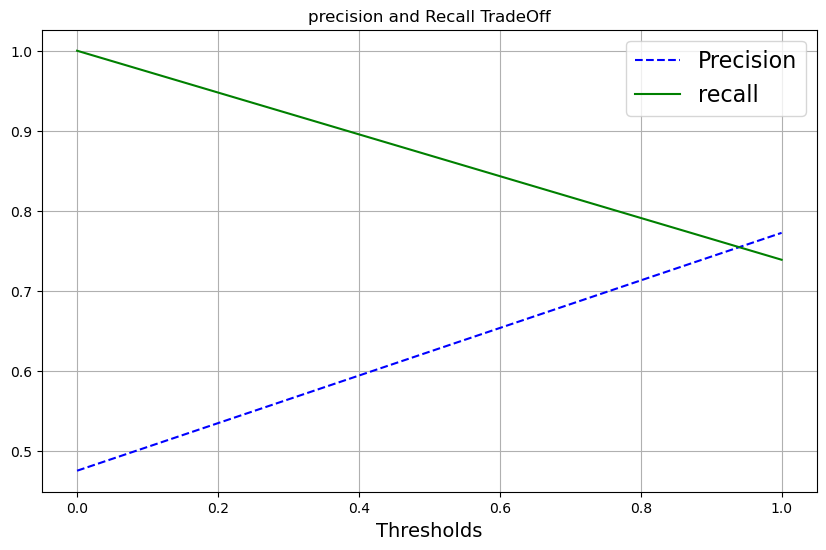

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(theresholds, precision_val_RF[:-1], "b--", label="Precision");
plt.plot(theresholds, recall_val_RF[:-1], "g-", label="recall");
plt.title("precision and Recall TradeOff")
plt.xlabel("Thresholds", fontsize=14)
plt.grid()
plt.legend(fontsize=16)
plt.show()

In [31]:
precision_score(y_train, cross_val_predict_RF > 0.6), recall_score(y_train, cross_val_predict_RF > -0.2)

(0.7727272727272727, 1.0)

In [32]:
precision_score(y_train, cross_val_predict_LO > 0.8), recall_score(y_train, cross_val_predict_LO > -0.8)

(0.6857142857142857, 1.0)